# Comparaison initial / reprojeté pour tous les modèles

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-04-25T07:15:12.891105+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-31-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

In [3]:
%watermark --iversions

watermark : 2.5.0
xarray    : 2025.1.1
numpy     : 2.0.2
cartopy   : 0.24.0
pandas    : 2.2.3
matplotlib: 3.10.0



## Définition des fonctions

In [24]:
def get_data(path_snc, path_areacella, path_sftlf):
    ds_snc = xr.open_dataset(path_snc)
    ds_area = xr.open_dataset(path_areacella)
    ds_sftlf = xr.open_dataset(path_sftlf)
    return ds_snc, ds_area, ds_sftlf

def extraction_variable_and_monthly_mean(ds_snc, variable="snc", start_year="1995", end_year="2014", lat_min=20):
    snc = ds_snc[variable].sel(time=slice(start_year, end_year))

    if lat_min is not None:
        snc = snc.sel(lat=snc.lat >= lat_min)

    snc = snc.where(snc < 1e19, float("nan"))

    max_val = snc.max().item()
    if max_val > 1.5:
        print(f"La variable '{variable}' est en %. Conversion en fraction.")
        snc = snc / 100

    if sftlf is not None:
        snc=snc.where(sftlf>0)

    snc = snc.clip(0, 1)

    snow_cover = snc.groupby("time.month").mean(dim="time")
    monthly_mean = snow_cover.mean(dim=("lat", "lon"))

    return snc, snow_cover, monthly_mean

def snow_surface_calculation(snow_cover, areacella):
    area_km2 = areacella * 1e-6
    snow_cover_km2 = (snow_cover * area_km2).groupby(snow_cover["month"]).sum(dim=["lat", "lon"], skipna=True)
    return snow_cover_km2

#def plot_snow_cover_initial(snc, time_index=0, title="Carte couverture neigeuse"):
    #plt.figure(figsize=(10, 5))
    #ax = plt.axes(projection=ccrs.PlateCarree())
    #snc.isel(time=time_index).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
    #ax.coastlines()
    #plt.title(title)
    #plt.show()

def plot_snow_cover_initial(snc, time_index=0, title="Carte couverture neigeuse", ax=None):
    if ax is None:
        plt.figure(figsize=(10, 5))
        ax = plt.axes(projection=ccrs.PlateCarree())
        show_plot = True
    else:
        show_plot = False
        
    snc.isel(time=time_index).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
    ax.coastlines()
    ax.set_title(title)

    if show_plot:
        plt.show

def plot_monthly_mean(monthly_mean, xlabel="Mois", ylabel="Average Snow Cover", title="Monthly average snow cover"):
    plt.plot(range(1, 13), monthly_mean, marker="o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

def plot_surface_km2(snow_cover_km2, xlabel="Mois", ylabel="Snowy surface (km2)", title="Average monthly snow cover area"):
    plt.plot(range(1, 13), snow_cover_km2, marker="o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

In [25]:
import os.path

files = os.listdir("/home/jovyan/private-storage/interp_models_hist_bis/")

nc_files = [filename for filename in files if filename.endswith(".nc")]
nc_files

['IPSL-CM6A-LR_hist_reprojete.nc',
 'BCC-CSM2-MR_hist_reprojete.nc',
 'CanESM5_hist_reprojete.nc',
 'CanESM5-CanOE_hist_reprojete.nc',
 'CESM2_hist_reprojete.nc',
 'CESM2-WACCM_hist_reprojete.nc',
 'CIESM_hist_reprojete.nc',
 'CNRM-CM6-1_hist_reprojete.nc',
 'CNRM-CM6-1-HR_hist_reprojete.nc',
 'CNRM-ESM2-1_hist_reprojete.nc',
 'EC-Earth3_hist_reprojete.nc',
 'EC-Earth3-Veg_hist_reprojete.nc',
 'FGOALS-f3-L_hist_reprojete.nc',
 'FGOALS-g3_hist_reprojete.nc',
 'GFDL-CM4_hist_reprojete.nc',
 'GISS-E2-1-G_hist_reprojete.nc',
 'HadGEM3-GC31-LL_hist_reprojete.nc',
 'MIROC-ES2L_hist_reprojete.nc',
 'MIROC6_hist_reprojete.nc',
 'MPI-ESM1-2-HR_hist_reprojete.nc',
 'MPI-ESM1-2-LR_hist_reprojete.nc',
 'MRI-ESM2-0_hist_reprojete.nc',
 'NorESM2-LM_hist_reprojete.nc',
 'NorESM2-MM_hist_reprojete.nc',
 'UKESM1-0-LL_hist_reprojete.nc']

## Utilisation des fonctions

Nom du modèle à changer à chaque fois

La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 'snc' est en %. Conversion en fraction.
La variable 

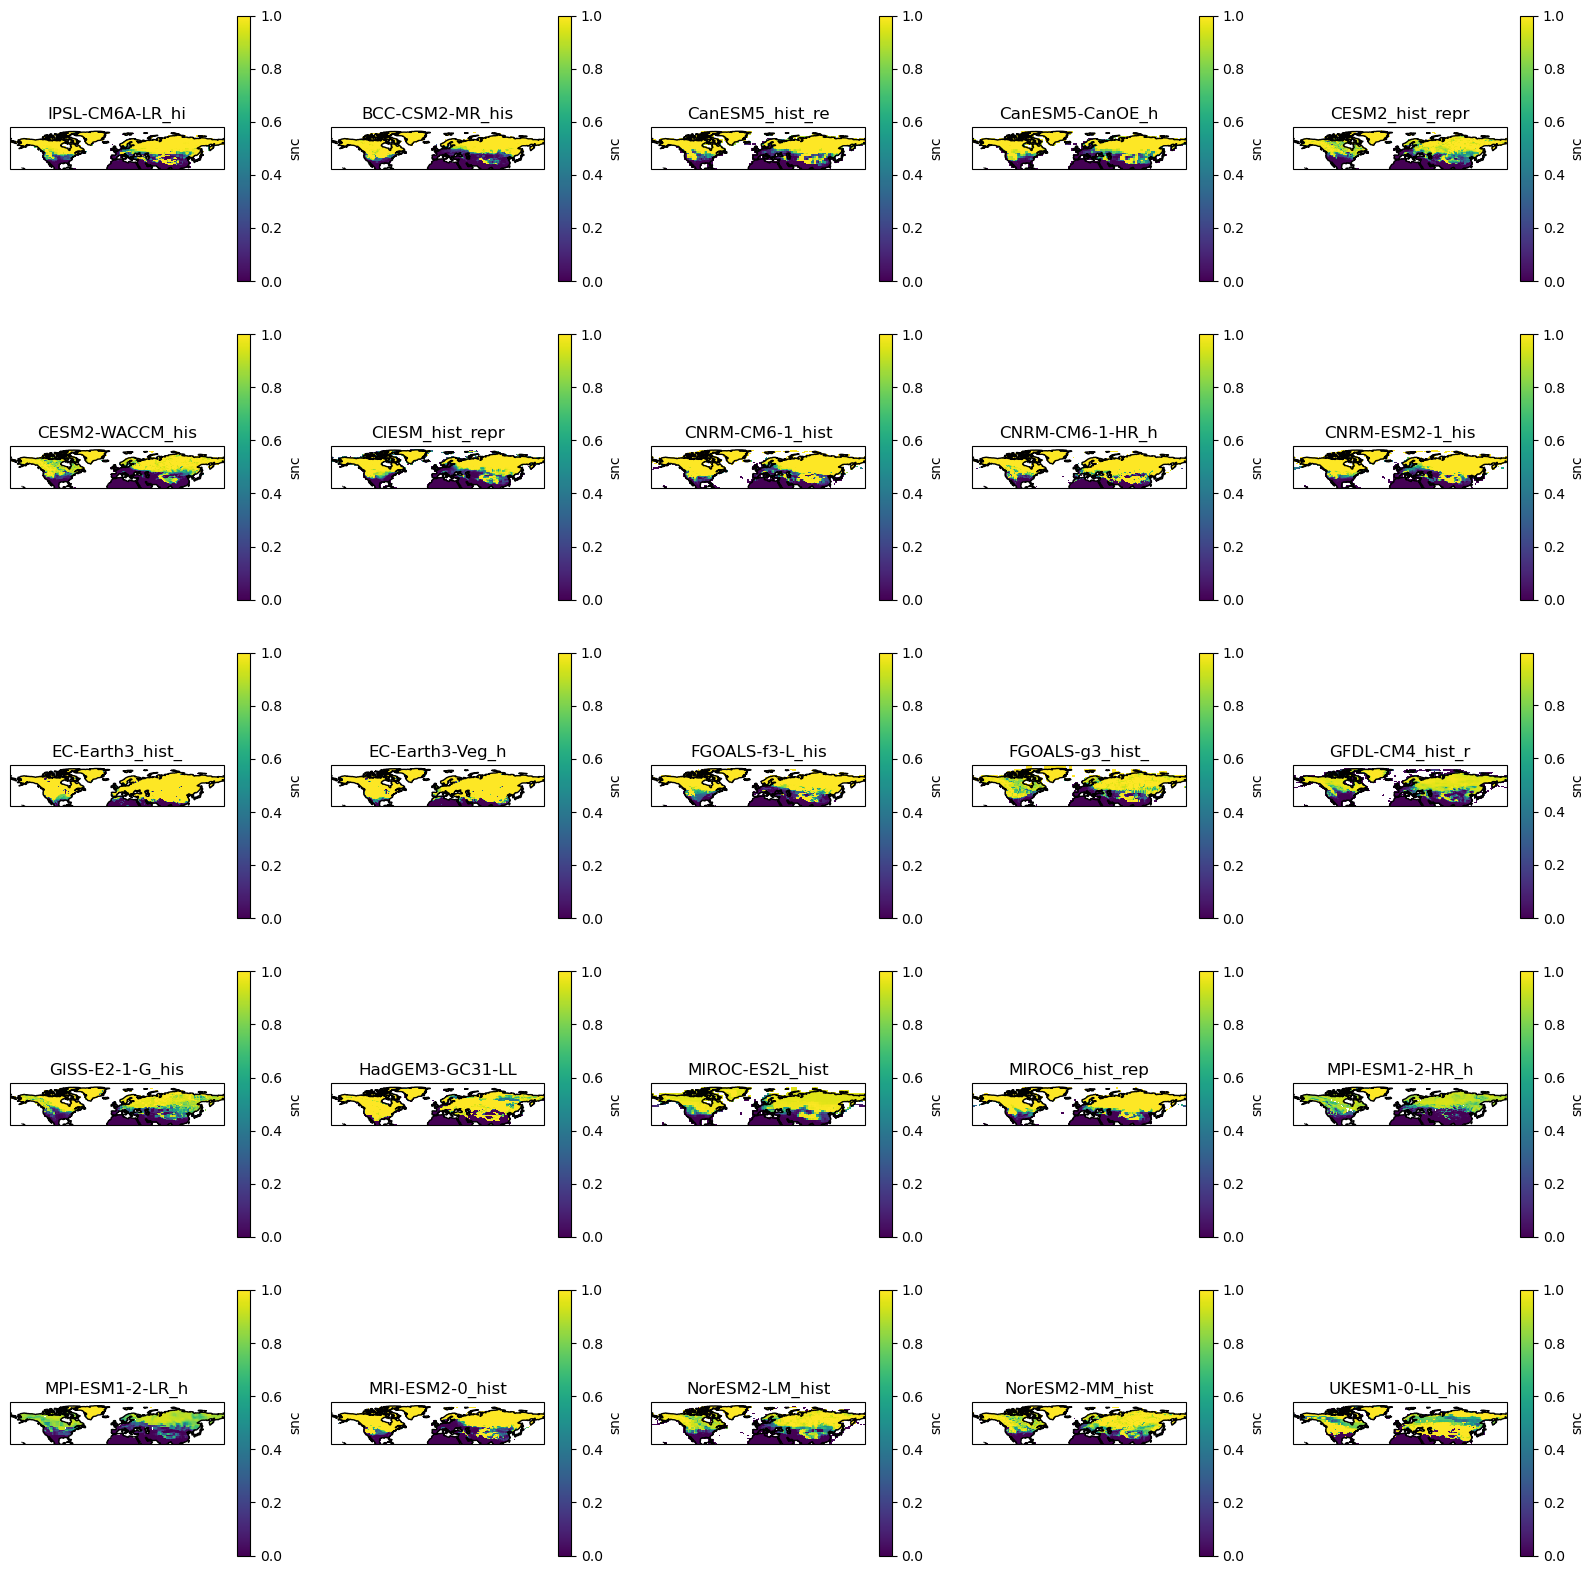

In [26]:
#plt.figure(figsize=(15, 15))
#fig.subplots(5, 5)
fig, axes = plt.subplots(5, 5, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

snow_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_snc = os.path.join("/home/jovyan/private-storage/interp_models_hist_bis/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/interp_sftlf_bis/", files.replace("hist", "sftlf"))
                                 
    ds_snc, ds_area, ds_sftlf = get_data(path_snc, path_areacella, path_sftlf)
    sftlf = ds_sftlf["sftlf"]
    snc, snow_cover, monthly_mean = extraction_variable_and_monthly_mean(ds_snc)
    areacella = ds_area["cell_area"]
    snow_cover_km2 = snow_surface_calculation(snow_cover, areacella)
    snow_cover_dict[model_name] = snow_cover_km2

    ax = axes[i]
    plot_snow_cover_initial(snc, ax=ax, title=files[:15])

    #print(snow_cover_km2)
    
    ds_snc.close()
    ds_area.close()

    #break

In [23]:
print(snow_cover_dict)#[model_name]

{'IPSL-CM6A-LR': <xarray.DataArray (month: 12)> Size: 96B
array([50631820.39966974, 49820916.09052228, 44322538.81419845,
       32387362.88001317, 16453529.49384107,  6659041.65574055,
        4814386.91057157,  4667036.38532715,  6063171.38065422,
       17214375.24424736, 33691015.9235258 , 45449160.23219088])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S255 255B ..., 'BCC-CSM2-MR': <xarray.DataArray (month: 12)> Size: 96B
array([44373746.08872143, 44552932.09814849, 41193897.37125953,
       33091211.296027  , 21241930.16713201,  9921410.96353975,
        5103984.16062283,  4124142.90262804,  5976217.31481302,
       16158221.92262049, 28392274.14817702, 39030064.97171247])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12, 'CanESM5': <xarray.DataArray (month: 12)> Size: 96B
array([49815466.45001311, 50758678.59106115, 46597043.11899264,
       36731964.36119152, 22770912.65681984,  9093042.38702341,
        3651710.3627

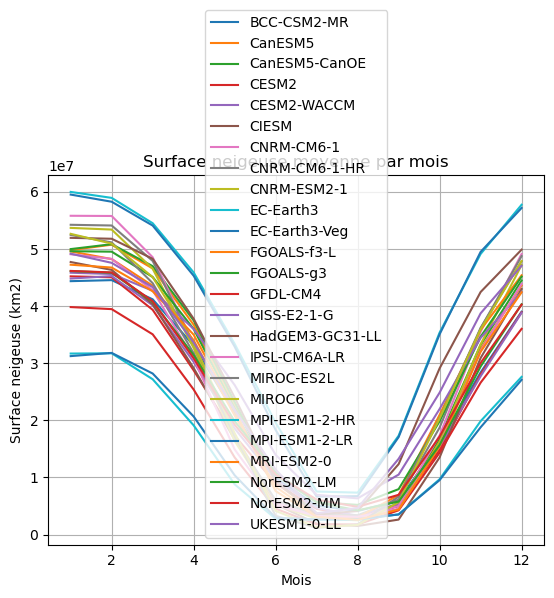

In [107]:
for model, values in snow_cover_dict.items():
    values.plot(label=model)

plt.title("Surface neigeuse moyenne par mois")
plt.xlabel("Mois")
plt.ylabel("Surface neigeuse (km2)")
plt.legend()
plt.grid()
plt.show()

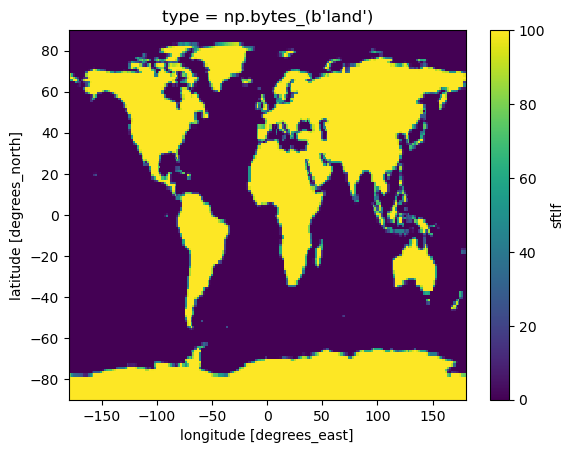

In [82]:
(sftlf).plot()

In [100]:
path_snc = os.path.join("/home/jovyan/private-storage/interp_models_hist_bis/", "MPI-ESM1-2-LR_hist_reprojete.nc")
path_areacella = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", "MPI-ESM1-2-LR_gridarea_hist_recalcule.nc")
path_sftlf = os.path.join("/home/jovyan/private-storage/interp_sftlf_bis/", "MPI-ESM1-2-LR_sftlf_reprojete.nc")

ds_snc, ds_area, ds_sftlf = get_data(path_snc, path_areacella, path_sftlf)
sftlf=ds_sftlf["sftlf"]
snc, snow_cover, monthly_mean = extraction_variable_and_monthly_mean(ds_snc)
areacella = ds_area["cell_area"]
snow_cover_km2 = snow_surface_calculation(snow_cover, areacella)

La variable 'snc' est en %. Conversion en fraction.


In [42]:
## test
path_snc = os.path.join("~/private-storage/historical-LImon-snc/", "snc_LImon_MPI-ESM1-2-LR_historical_r10i1p1f1_gn_185001-201412.nc")
path_areacella = os.path.join("/home/jovyan/private-storage/masques/masques/areacella/", "areacella_MPI-ESM1-2-LR.nc") ## ici soit areacella soit pseudo_areacella (chemin)

ds_snc, ds_area = get_data(path_snc, path_areacella)
snc, snow_cover, monthly_mean = extraction_variable_and_monthly_mean(ds_snc)
areacella = ds_area["areacella"]
snow_cover_km2 = snow_surface_calculation(snow_cover, areacella)

La variable 'snc' est en %. Conversion en fraction.


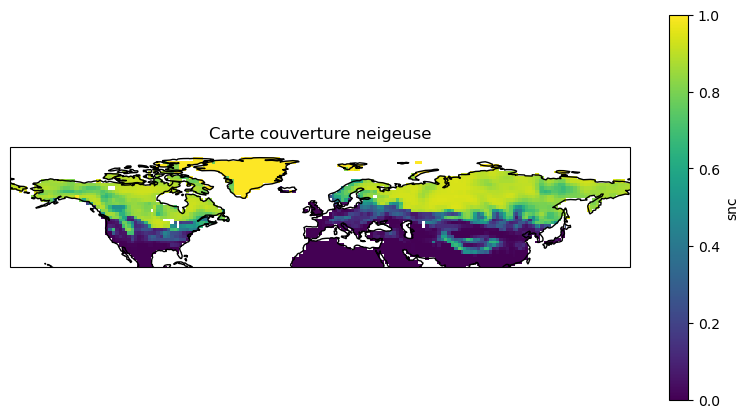

In [101]:
plot_snow_cover_initial(snc)#, time_index=48, title="Initial snow cover")
#snc.savefig("snc_IPSL-CM6A-LR.png")

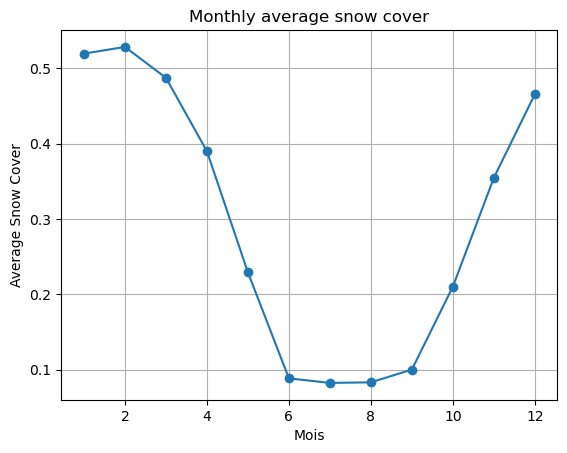

In [102]:
plot_monthly_mean(monthly_mean)

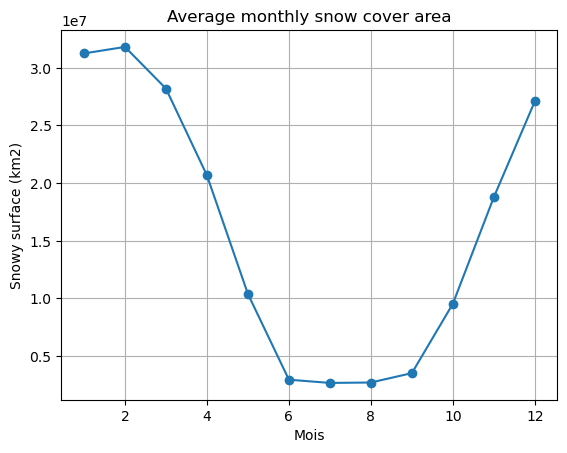

In [103]:
plot_surface_km2(snow_cover_km2)

In [104]:
snow_cover_km2

<xarray.DataArray (month: 12)> Size: 96B
array([31251024.75896746, 31813660.30311019, 28202785.08130873,
       20673690.28020985, 10389557.91832135,  2952667.33857501,
        2673533.40473532,  2709464.82470205,  3524088.68190288,
        9541666.72758722, 18789176.29954356, 27100791.21686845])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [8]:
path_sftgif = os.path.join("/home/jovyan/private-storage/interp_sftgif_bis/", "IPSL-CM6A-LR_sftgif_reprojete.nc")

ds_snc = xr.open_dataset(path_snc)
ds_sftgif = xr.open_dataset(path_sftgif)

snc = ds_snc["snc"]
sftgif = ds_sftgif["sftgif"]

# Option 1: Remplacer les NaN de snc par sftgif là où snc est NaN
snc_combined = snc.where(~np.isnan(snc), sftgif)

In [9]:
snc_combined.to_netcdf("snc_combined.nc", format="NETCDF4")

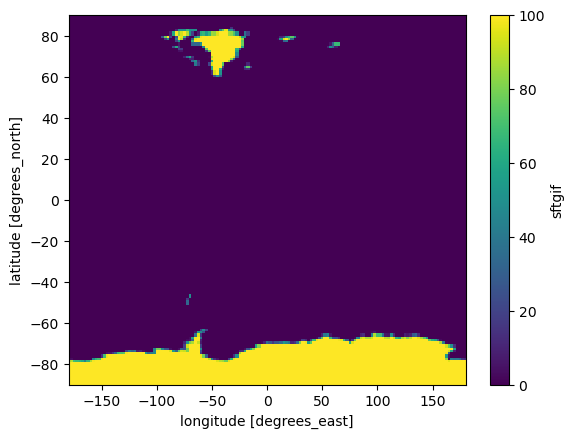

In [10]:
sftgif.plot()

In [15]:
path_snc = os.path.join("/home/jovyan/private-storage/interp_models_hist_bis/", "IPSL-CM6A-LR2_hist_reprojete.nc")
path_areacella = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", "IPSL-CM6A-LR_gridarea_hist_recalcule.nc")

ds_snc, ds_area, ds_sftlf = get_data(path_snc, path_areacella, path_sftlf)
sftlf=ds_sftlf["sftlf"]
snc, snow_cover, monthly_mean = extraction_variable_and_monthly_mean(ds_snc)
areacella = ds_area["cell_area"]
snow_cover_km2 = snow_surface_calculation(snow_cover, areacella)

La variable 'snc' est en %. Conversion en fraction.


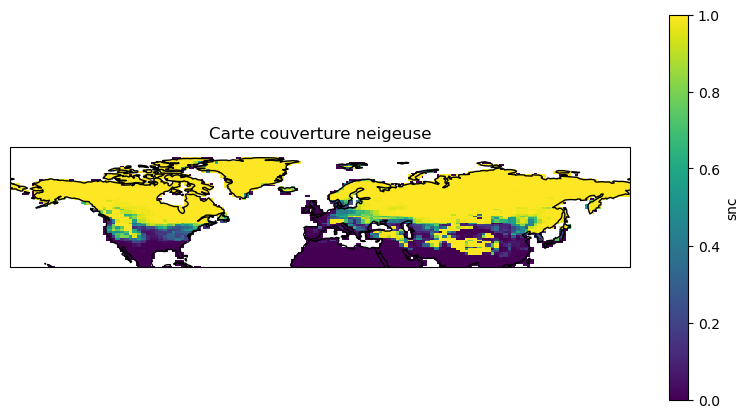

In [16]:
plot_snow_cover_initial(snc)#, time_index=48, title="Initial snow cover")

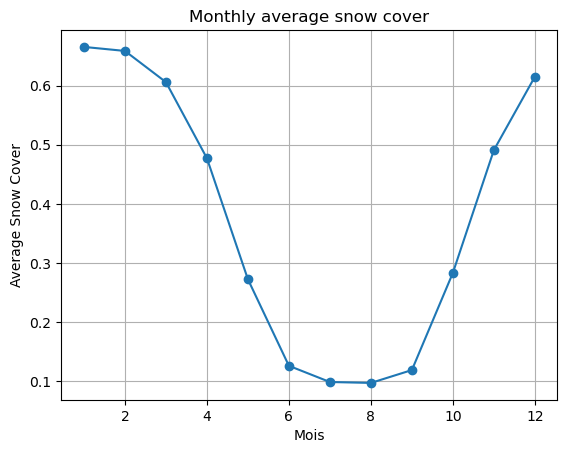

In [17]:
plot_monthly_mean(monthly_mean)

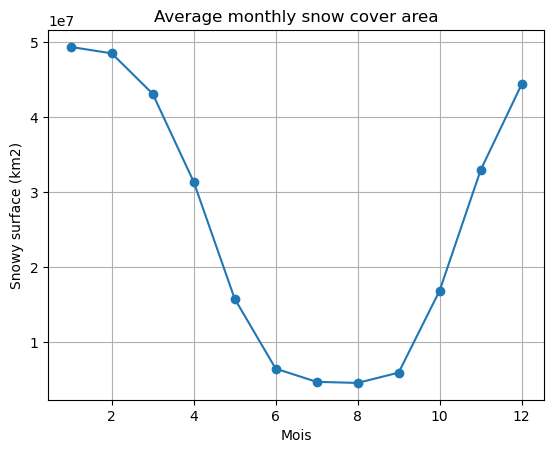

In [18]:
plot_surface_km2(snow_cover_km2)

In [19]:
snow_cover_km2

<xarray.DataArray (month: 12)> Size: 96B
array([49370905.11578925, 48513419.98863465, 43110294.74757737,
       31360399.80620138, 15751091.03759549,  6418971.20316688,
        4653502.98605301,  4510033.28392926,  5884811.06161806,
       16824759.73370215, 32913528.05154339, 44368845.24920465])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S4 4B ...